# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [1]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 0.0, E_test is 0.0134374
Average number of iterations is 135.522.


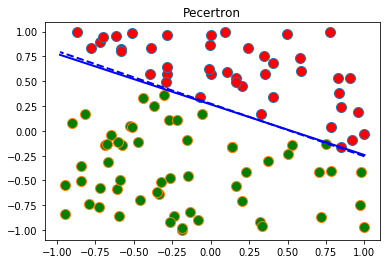

In [2]:
from perceptron import perceptron
from error_compute_wf import error_compute_wf

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 10000
iter_sum = 0.0
preceptron_train_error_sum = 0
preceptron_test_error_sum = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, iters = perceptron(X, y)
    # Compute training, testing error
    train_error = error_compute_wf(w_g, X, w_f)
    testX, testy, w_test = mkdata(nTest)
    test_error = error_compute_wf(w_g, testX, w_f)
    # Sum up number of iterations
    preceptron_train_error_sum = preceptron_train_error_sum + train_error
    preceptron_test_error_sum = preceptron_test_error_sum + test_error
    iter_sum = iter_sum + iters;
# result
E_train = preceptron_train_error_sum / (nRep * nTrain);
E_test = preceptron_test_error_sum / (nRep * nTest);
avgIter = iter_sum / nRep;
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

In [3]:
nTrain = 100 # number of training data
X, y, w_f = mkdata(nTrain, 'noisy')
w_g, iters = perceptron(X, y)
# print('E_train is {}, E_test is {}'.format(E_train, E_test))
# print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron Non-linearly separable')


KeyboardInterrupt: 

### Part3: Linear Regression

E_train is 0.03972, E_test is 0.0485959


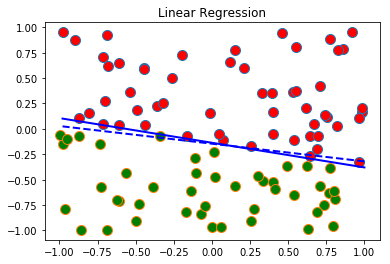

In [4]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data
nTest = 10000;
lr_train_error_sum = 0;
lr_test_error_sum = 0;

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
#     print(w_f)
    w_g = linear_regression(X, y)
    # Compute training, testing error

    train_error = error_compute_wf(w_g, X, w_f);
    testX, testy, w_test = mkdata(nTest);
    test_error = error_compute_wf(w_g, testX, w_f);
    lr_train_error_sum = lr_train_error_sum + train_error;
    lr_test_error_sum = lr_test_error_sum + test_error;
E_train = lr_train_error_sum / (nRep * nTrain);
E_test = lr_test_error_sum / (nRep * nTest);
print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X, y, w_f, w_g, 'Linear Regression');


## Part4: Linear Regression: noisy

E_train is 0.05113, E_test is 0.0591686


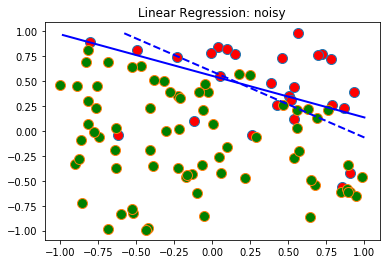

In [5]:

nRep = 1000; # number of replicates
nTrain = 100; # number of training data
nTest = 10000
lr_noisy_train_error_sum = 0
lr_noisy_test_error_sum = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = linear_regression(X, y);
    # Compute training, testing error
    train_error = error_compute_wf(w_g, X, w_f);
    testX, testy, w_test = mkdata(nTest);
    test_error = error_compute_wf(w_g, testX, w_f);
    lr_noisy_train_error_sum = lr_noisy_train_error_sum + train_error;
    lr_noisy_test_error_sum  = lr_noisy_test_error_sum + test_error;
E_train = lr_noisy_train_error_sum / (nRep * nTrain);
E_test = lr_noisy_test_error_sum / (nRep * nTest);
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression: noisy');

## Part5: Linear Regression: poly_fit

In [16]:
from error_compute_y import error_compute_y
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)
# Compute training, testing error
lr_polifit_train_error = error_compute_y(w, X, y)
lr_polifit_test_error = error_compute_y(w, X_test, y_test)

E_train = lr_polifit_train_error / X.shape[1]
E_test = lr_polifit_test_error / X_test.shape[1]
print('E_train is {}, E_test is {}'.format(E_train, E_test))

# poly_fit with transform
X_t = X  # CHANGE THIS LINE TO DO TRANSFORMATION
X_t = np.vstack((X_t, np.ones((3, X_t.shape[1]))))
for i in range(X.shape[1]):
    X_t[2,i] = X_t[0,i] * X_t[1, i]
    X_t[3,i] = X_t[0,i] * X_t[0, i]
    X_t[4,i] = X_t[1,i] * X_t[1, i]
    
X_test_t = X_test  # CHANGE THIS LINE TO DO TRANSFORMATION
X_test_t = np.vstack((X_test_t, np.ones((3, X_test.shape[1]))))
for i in range(X_test.shape[1]):
    X_test_t[2,i] = X_test_t[0,i] * X_test_t[1, i]
    X_test_t[3,i] = X_test_t[0,i] * X_test_t[0, i]
    X_test_t[4,i] = X_test_t[1,i] * X_test_t[1, i]
w = linear_regression(X_t, y)

# Compute training, testing error
lr_polifit_train_error_transform = error_compute_y(w, X_t, y)
lr_polifit_test_error_transform = error_compute_y(w, X_test_t, y_test)

E_train = lr_polifit_train_error_transform / X.shape[1]
E_test = lr_polifit_test_error_transform / X_test.shape[1]
print('E_train is {}, E_test is {}'.format(E_train, E_test))

E_train is 0.49, E_test is 0.5496
E_train is 0.05, E_test is 0.066


## Part6: Logistic Regression

E_train is 0.0007, E_test is 0.010672


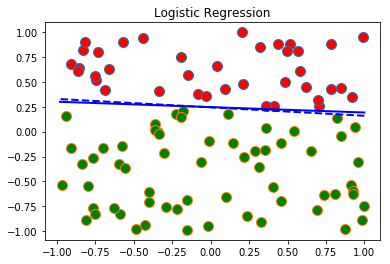

In [26]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 10000;
log_train_error_sum = 0;
log_test_error_sum = 0;

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = logistic(X, y);
    # Compute training, testing error
    train_error = error_compute_wf(w_g, X, w_f)
    testX, testy, w_test = mkdata(nTest)
    test_error = error_compute_wf(w_g, testX, w_f)
    log_train_error_sum = log_train_error_sum + train_error;
    log_test_error_sum = log_test_error_sum + test_error;

E_train = log_train_error_sum / (nRep * nTrain);
E_test = log_test_error_sum / (nRep * nTest);
print('E_train is {}, E_test is {}'.format(E_train, E_test))


plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part7: Logistic Regression: noisy

E_train is 0.0833, E_test is 0.090757


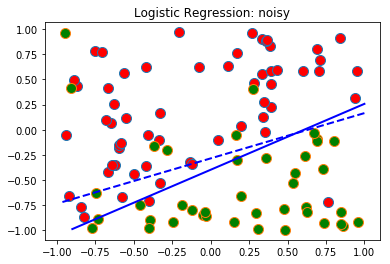

In [27]:

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 10000; # number of training data
log_noisy_train_error_sum = 0;
log_noisy_test_error_sum = 0;

for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = logistic(X, y)
    # Compute training, testing error
    train_error = error_compute_wf(w_g, X, w_f);
    testX, testy, w_test = mkdata(nTest);
    test_error = error_compute_wf(w_g, testX, w_f);
    log_noisy_train_error_sum = log_noisy_train_error_sum + train_error;
    log_noisy_test_error_sum = log_noisy_test_error_sum + test_error;
E_train = log_noisy_train_error_sum / (nRep * nTrain);
E_test = log_noisy_test_error_sum / (nRep * nTest);
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part8: SVM

In [ ]:
from svm import svm

nRep = 1000; # number of replicates
nTrain = 100; # number of training data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, num_sc = svm(X, y)
    # Compute training, testing error
    # Sum up number of support vectors

# print('E_train is {}, E_test is {}'.format(E_train, E_test))
# print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.